In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
from sklearn.decomposition import FactorAnalysis
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from sklearn.pipeline import Pipeline

In [2]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [248]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')
features.remove('subject')

# Separating out the features
x = train.loc[:, features].values
test_features = test.loc[:, features].values

# Separating out the target
y = train.loc[:,['Activity']].values
test_labels = test.loc[:,['Activity']].values

train_features, validation_features, train_labels, validation_labels = train_test_split(x, y, test_size=0.25, random_state=1300)

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])
print(train_features.shape)
print(test_features.shape)

(5825, 561)
(3162, 561)


In [6]:
from sklearn.neural_network import MLPClassifier

In [195]:
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000, solver='adam', activation='relu', verbose=False)

In [196]:
mlp.fit(train_features, np.ravel(train_labels))

MLPClassifier(hidden_layer_sizes=(10, 10), max_iter=1000)

In [197]:
pred_train = mlp.predict(train_features)
pred_train

array(['WALKING', 'WALKING_DOWNSTAIRS', 'LAYING', ..., 'WALKING',
       'STANDING', 'WALKING_DOWNSTAIRS'], dtype='<U18')

In [198]:
from sklearn.metrics import classification_report, confusion_matrix

In [199]:
confusion_matrix(train_labels, pred_train)

array([[1049,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,   36,    8,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   1,   13,   25,    0,    0,    0,    0,    0,    0,    0,    0,
           0],
       [   0,    0,    0,  926,    0,    1,   30,    0,    0,    0,    0,
           0],
       [   0,    0,    0,    0,   43,    0,    0,   12,    0,    0,    0,
           0],
       [   0,    0,    0,    1,    0,   14,    0,    0,    1,    0,    0,
           0],
       [   0,    0,    0,    7,    0,    0, 1059,    0,    0,    0,    0,
           0],
       [   0,    0,    2,    0,    3,    0,    0,   64,    1,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    1,   38,    0,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,  928,    0,
           0],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,  757,
           0],
       [   0,    0,  

In [200]:
print(classification_report(train_labels, pred_train, zero_division=0))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00      1049
        LIE_TO_SIT       0.73      0.82      0.77        44
      LIE_TO_STAND       0.71      0.64      0.68        39
           SITTING       0.99      0.97      0.98       957
        SIT_TO_LIE       0.93      0.78      0.85        55
      SIT_TO_STAND       0.93      0.88      0.90        16
          STANDING       0.97      0.99      0.98      1066
      STAND_TO_LIE       0.83      0.91      0.87        70
      STAND_TO_SIT       0.95      0.97      0.96        39
           WALKING       1.00      1.00      1.00       928
WALKING_DOWNSTAIRS       1.00      1.00      1.00       757
  WALKING_UPSTAIRS       1.00      1.00      1.00       805

          accuracy                           0.99      5825
         macro avg       0.92      0.91      0.92      5825
      weighted avg       0.99      0.99      0.99      5825



In [201]:
pred = mlp.predict(validation_features)
pred

array(['STANDING', 'WALKING_UPSTAIRS', 'SITTING', ...,
       'WALKING_DOWNSTAIRS', 'LAYING', 'LAYING'], dtype='<U18')

In [202]:
confusion_matrix(validation_labels, pred)

array([[360,   0,   2,   1,   1,   0,   0,   0,   0,   0,   0,   0],
       [  0,  14,   1,   0,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   8,   8,   1,   0,   0,   0,   1,   0,   0,   0,   0],
       [  0,   0,   0, 311,   0,   0,  25,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,  10,   1,   1,   7,   1,   0,   0,   0],
       [  0,   0,   0,   1,   0,   5,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   5,   0,   0, 352,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   6,   0,   0,  13,   1,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 297,   1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   1, 229,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   2, 266]],
      dtype=int64)

In [203]:
print(classification_report(validation_labels, pred, zero_division=0))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       364
        LIE_TO_SIT       0.64      0.88      0.74        16
      LIE_TO_STAND       0.73      0.44      0.55        18
           SITTING       0.97      0.93      0.95       336
        SIT_TO_LIE       0.59      0.50      0.54        20
      SIT_TO_STAND       0.83      0.71      0.77         7
          STANDING       0.93      0.99      0.96       357
      STAND_TO_LIE       0.59      0.65      0.62        20
      STAND_TO_SIT       0.73      1.00      0.84         8
           WALKING       1.00      1.00      1.00       298
WALKING_DOWNSTAIRS       0.99      1.00      0.99       230
  WALKING_UPSTAIRS       1.00      0.99      1.00       268

          accuracy                           0.96      1942
         macro avg       0.83      0.84      0.83      1942
      weighted avg       0.97      0.96      0.96      1942



In [204]:
# First, we need to standardize the data to get better performance
test_features = test.columns.values.tolist()
test_features.remove('Activity')
test_features.remove('subject')

# Separating out the features
x_test = test.loc[:, test_features].values

# Separating out the target
y_test = test.loc[:,['Activity']].values

print(x_test.shape)

(3162, 561)


In [205]:
result = mlp.predict(x_test)
result

array(['STANDING', 'STANDING', 'STANDING', ..., 'WALKING_UPSTAIRS',
       'WALKING_UPSTAIRS', 'WALKING_UPSTAIRS'], dtype='<U18')

In [206]:
confusion_matrix(y_test, result)

array([[539,   0,   3,   0,   0,   0,   2,   0,   0,   0,   0,   1],
       [  0,  16,   8,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0,  13,  10,   0,   0,   0,   0,   1,   2,   0,   0,   1],
       [  0,   0,   0, 427,   0,   0,  77,   1,   3,   0,   0,   0],
       [  0,   0,   0,   0,  21,   0,   0,  10,   0,   0,   0,   1],
       [  0,   0,   0,   0,   0,   9,   0,   0,   1,   0,   0,   0],
       [  0,   0,   0,   8,   0,   0, 545,   0,   2,   1,   0,   0],
       [  0,   1,   0,   1,  10,   0,   2,  24,   9,   0,   0,   2],
       [  0,   0,   0,   2,   0,   2,   0,   3,  14,   1,   0,   1],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0, 479,   3,  14],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9, 395,  16],
       [  0,   0,   0,   0,   0,   0,   0,   1,   3,  51,   3, 413]],
      dtype=int64)

In [208]:
print(classification_report(y_test, result, zero_division=0))

                    precision    recall  f1-score   support

            LAYING       1.00      0.99      0.99       545
        LIE_TO_SIT       0.53      0.64      0.58        25
      LIE_TO_STAND       0.48      0.37      0.42        27
           SITTING       0.97      0.84      0.90       508
        SIT_TO_LIE       0.68      0.66      0.67        32
      SIT_TO_STAND       0.82      0.90      0.86        10
          STANDING       0.87      0.98      0.92       556
      STAND_TO_LIE       0.60      0.49      0.54        49
      STAND_TO_SIT       0.40      0.61      0.48        23
           WALKING       0.89      0.97      0.92       496
WALKING_DOWNSTAIRS       0.99      0.94      0.96       420
  WALKING_UPSTAIRS       0.92      0.88      0.90       471

          accuracy                           0.91      3162
         macro avg       0.76      0.77      0.76      3162
      weighted avg       0.92      0.91      0.91      3162



### Train on selected features from RFE

In [301]:
rfe_features = np.array(['tBodyAcc-Mean-1                ', 'tBodyAcc-Mean-2                ',
 'tBodyAcc-STD-1                 ', 'tBodyAcc-Mad-1                 ',
 'tBodyAcc-Max-1                 ', 'tBodyAcc-Energy-1              ',
 'tBodyAcc-ropy-1                ', 'tBodyAcc-Correlation-1         ',
 'tBodyAcc-Correlation-3         ', 'tGravityAcc-Mean-1             ',
 'tGravityAcc-Mean-2             ', 'tGravityAcc-Mean-3             ',
 'tGravityAcc-STD-1              ', 'tGravityAcc-Mad-1              ',
 'tGravityAcc-Mad-2              ', 'tGravityAcc-Max-1              ',
 'tGravityAcc-Max-2              ', 'tGravityAcc-Max-3              ',
 'tGravityAcc-Min-1              ', 'tGravityAcc-Min-2              ',
 'tGravityAcc-Min-3              ', 'tGravityAcc-SMA-1              ',
 'tGravityAcc-Energy-1           ', 'tGravityAcc-Energy-2           ',
 'tGravityAcc-Energy-3           ', 'tGravityAcc-ropy-1             ',
 'tGravityAcc-ropy-1             .1', 'tGravityAcc-ARCoeff-1          ',
 'tGravityAcc-ARCoeff-2          ', 'tGravityAcc-ARCoeff-3          ',
 'tGravityAcc-ARCoeff-4          ', 'tGravityAcc-ARCoeff-5          ',
 'tGravityAcc-ARCoeff-6          ', 'tGravityAcc-ARCoeff-7          ',
 'tGravityAcc-ARCoeff-8          ', 'tGravityAcc-ARCoeff-9          ',
 'tGravityAcc-ARCoeff-10         ', 'tGravityAcc-ARCoeff-11         ',
 'tGravityAcc-ARCoeff-12         ', 'tGravityAcc-Correlation-1      ',
 'tBodyAccJerk-STD-1             ', 'tBodyAccJerk-Mad-1             ',
 'tBodyAccJerk-Mad-2             ', 'tBodyAccJerk-Max-1             ',
 'tBodyAccJerk-SMA-1             ', 'tBodyAccJerk-Energy-1          ',
 'tBodyAccJerk-IQR-1             ', 'tBodyAccJerk-IQR-2             ',
 'tBodyAccJerk-ropy-1            ', 'tBodyAccJerk-ropy-1            .1',
 'tBodyGyro-STD-1                ', 'tBodyGyro-Mad-1                ',
 'tBodyGyro-Mad-2                ', 'tBodyGyro-Max-1                ',
 'tBodyGyro-Min-1                ', 'tBodyGyro-IQR-1                ',
 'tBodyGyro-IQR-2                ', 'tBodyGyro-IQR-3                ',
 'tBodyGyro-ropy-1               ', 'tBodyGyro-Correlation-3        ',
 'tBodyGyroJerk-STD-1            ', 'tBodyGyroJerk-Mad-1            ',
 'tBodyGyroJerk-SMA-1            ', 'tBodyGyroJerk-Energy-1         ',
 'tBodyGyroJerk-IQR-1            ', 'tBodyGyroJerk-IQR-3            ',
 'tBodyGyroJerk-Correlation-1    ', 'tBodyAccMag-Mean-1             ',
 'tBodyAccMag-STD-1              ', 'tBodyAccMag-Mad-1              ',
 'tBodyAccMag-SMA-1              ', 'tBodyAccMag-ARCoeff-1          ',
 'tBodyAccMag-ARCoeff-2          ', 'tGravityAccMag-Mean-1          ',
 'tGravityAccMag-STD-1           ', 'tGravityAccMag-Mad-1           ',
 'tGravityAccMag-Energy-1        ', 'tGravityAccMag-ARCoeff-1       ',
 'tGravityAccMag-ARCoeff-2       ', 'tBodyAccJerkMag-Mean-1         ',
 'tBodyAccJerkMag-Mad-1          ', 'tBodyAccJerkMag-SMA-1          ',
 'tBodyAccJerkMag-Energy-1       ', 'tBodyAccJerkMag-IQR-1          ',
 'tBodyAccJerkMag-ropy-1         ', 'fBodyAcc-Mean-1                ',
 'fBodyAcc-STD-1                 ', 'fBodyAcc-Mad-1                 ',
 'fBodyAcc-Max-1                 ', 'fBodyAcc-SMA-1                 ',
 'fBodyAcc-Energy-1              ', 'fBodyAcc-MaxInds-1             ',
 'fBodyAcc-MeanFreq-3            ', 'fBodyAcc-BandsEnergyOld-1      ',
 'fBodyAcc-BandsEnergyOld-9      ', 'fBodyAcc-BandsEnergyOld-13     ',
 'fBodyAccJerk-STD-1             ', 'fBodyAccJerk-Max-1             ',
 'fBodyAccJerk-Energy-1          ', 'fBodyAccJerk-ropy-1            ',
 'fBodyAccJerk-MaxInds-1         ', 'fBodyAccJerk-MaxInds-3         ',
 'fBodyAccJerk-BandsEnergyOld-1  ', 'fBodyAccJerk-BandsEnergyOld-9  ',
 'fBodyAccJerk-BandsEnergyOld-13 ', 'fBodyGyro-Mean-1               ',
 'fBodyGyro-STD-1                ', 'fBodyGyro-STD-3                ',
 'fBodyGyro-Mad-1                ', 'fBodyGyro-Max-1                ',
 'fBodyGyro-Max-2                ', 'fBodyGyro-Max-3                ',
 'fBodyGyro-MaxInds-1            ', 'fBodyGyro-MaxInds-3            ',
 'fBodyGyro-MeanFreq-1           ', 'fBodyGyro-Skewness-1           .2',
 'fBodyGyro-BandsEnergyOld-1     ', 'fBodyGyro-BandsEnergyOld-2     ',
 'fBodyGyro-BandsEnergyOld-9     ', 'fBodyGyro-BandsEnergyOld-13    ',
 'fBodyGyro-BandsEnergyOld-15    ', 'fBodyGyro-BandsEnergyOld-41    ',
 'fBodyAccMag-Mean-1             ', 'fBodyAccMag-STD-1              ',
 'fBodyAccMag-Mad-1              ', 'fBodyAccMag-Max-1              ',
 'fBodyAccMag-SMA-1              ', 'fBodyAccMag-Energy-1           ',
 'tXAxisAcc-AngleWRTGravity-1    ', 'tYAxisAcc-AngleWRTGravity-1    ',
 'tZAxisAcc-AngleWRTGravity-1    ']
)

rfe_features.shape

(131,)

In [523]:
# Imports
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical

In [524]:
# Configuration options
feature_vector_length = 561
num_classes = 12

In [525]:
# First, we need to standardize the data to get better performance
features = train.columns.values.tolist()
features.remove('Activity')
features.remove('subject')

# Separating out the features
train_features = train.loc[:, features].values
test_features = test.loc[:, features].values

# Separating out the target
train_labels = train.loc[:,['Activity']].values
test_labels = test.loc[:,['Activity']].values

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

print(train_features.shape)
print(test_features.shape)

mapping = {
  "WALKING": 1,
  "WALKING_UPSTAIRS": 2,
  "WALKING_DOWNSTAIRS": 3,
  "SITTING": 4,
  "STANDING": 5,
  "LAYING": 6,
  "STAND_TO_SIT": 7,
  "SIT_TO_STAND": 8,
  "SIT_TO_LIE": 9,
  "LIE_TO_SIT": 10,
  "STAND_TO_LIE": 11,
  "LIE_TO_STAND": 12
}

mapToNumber = lambda x: mapping[x] - 1
vfunc = np.vectorize(mapToNumber)
train_labels = vfunc(train_labels)
test_labels = vfunc(test_labels)
print(train_labels.shape)
print(test_labels.shape)

(7767, 561)
(3162, 561)
(7767, 1)
(3162, 1)


In [526]:
X_train = train_features
X_test = test_features

Y_train = to_categorical(train_labels, num_classes)
Y_test = to_categorical(test_labels, num_classes)

In [527]:
input_shape = (feature_vector_length,)

model = Sequential()
model.add(Dense(70, input_shape=input_shape, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [528]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=60, batch_size=250, verbose=0, validation_split=0.2)

In [529]:
test_results = model.evaluate(X_test, Y_test, verbose=1)

99/99 [==============================] - 0s 490us/step - loss: 0.2291 - accuracy: 0.9279


In [530]:
# Configuration options
feature_vector_length = 131
num_classes = 12

In [531]:
# First, we need to standardize the data to get better performance
features = rfe_features

# Separating out the features
train_features = train.loc[:, features].values
test_features = test.loc[:, features].values

# Separating out the target
train_labels = train.loc[:,['Activity']].values
test_labels = test.loc[:,['Activity']].values

train_labels = pd.DataFrame(train_labels, columns=['Activity'])
validation_labels = pd.DataFrame(validation_labels, columns=['Activity'])

print(train_features.shape)
print(test_features.shape)

mapping = {
  "WALKING": 1,
  "WALKING_UPSTAIRS": 2,
  "WALKING_DOWNSTAIRS": 3,
  "SITTING": 4,
  "STANDING": 5,
  "LAYING": 6,
  "STAND_TO_SIT": 7,
  "SIT_TO_STAND": 8,
  "SIT_TO_LIE": 9,
  "LIE_TO_SIT": 10,
  "STAND_TO_LIE": 11,
  "LIE_TO_STAND": 12
}

mapToNumber = lambda x: mapping[x] - 1
vfunc = np.vectorize(mapToNumber)
train_labels = vfunc(train_labels)
test_labels = vfunc(test_labels)
print(train_labels.shape)
print(test_labels.shape)

(7767, 131)
(3162, 131)
(7767, 1)
(3162, 1)


In [532]:
X_train = train_features
X_test = test_features

Y_train = to_categorical(train_labels, num_classes)
Y_test = to_categorical(test_labels, num_classes)

In [533]:
input_shape = (feature_vector_length,)

model = Sequential()
model.add(Dense(70, input_shape=input_shape, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [534]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, epochs=60, batch_size=250, verbose=1, validation_split=0.2)

Epoch 1/60
25/25 [==============================] - 0s 5ms/step - loss: 1.7657 - accuracy: 0.3892 - val_loss: 1.2775 - val_accuracy: 0.5644
Epoch 2/60
25/25 [==============================] - 0s 2ms/step - loss: 1.1278 - accuracy: 0.6350 - val_loss: 0.7740 - val_accuracy: 0.8353
Epoch 3/60
25/25 [==============================] - 0s 2ms/step - loss: 0.7554 - accuracy: 0.7706 - val_loss: 0.5171 - val_accuracy: 0.8668
Epoch 4/60
25/25 [==============================] - 0s 2ms/step - loss: 0.5614 - accuracy: 0.8136 - val_loss: 0.4046 - val_accuracy: 0.8790
Epoch 5/60
25/25 [==============================] - 0s 2ms/step - loss: 0.4586 - accuracy: 0.8366 - val_loss: 0.3405 - val_accuracy: 0.8867
Epoch 6/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3883 - accuracy: 0.8584 - val_loss: 0.2978 - val_accuracy: 0.8983
Epoch 7/60
25/25 [==============================] - 0s 2ms/step - loss: 0.3396 - accuracy: 0.8783 - val_loss: 0.2686 - val_accuracy: 0.9048
Epoch 8/60
25/25 [==

Epoch 59/60
25/25 [==============================] - 0s 2ms/step - loss: 0.0833 - accuracy: 0.9659 - val_loss: 0.1893 - val_accuracy: 0.9356
Epoch 60/60
25/25 [==============================] - 0s 2ms/step - loss: 0.0824 - accuracy: 0.9680 - val_loss: 0.1876 - val_accuracy: 0.9363


In [535]:
test_results = model.evaluate(X_test, Y_test, verbose=1)

99/99 [==============================] - 0s 388us/step - loss: 0.2658 - accuracy: 0.9099


In [536]:
train = pd.read_csv("./input/Train/train.csv")
test = pd.read_csv("./input/Test/test.csv")

print("shape of train: ", train.shape, "shape of test: ", test.shape)

shape of train:  (7767, 563) shape of test:  (3162, 563)


In [537]:
from imblearn.over_sampling import SMOTE

# Separating out the features for training data
features = train.columns.values.tolist()
features.remove('Activity')
features.remove('subject')

# Separating out the features
train_features = train.loc[:, features].values
test_features = test.loc[:, features].values

# Separating out the target
train_labels = train.loc[:,['Activity']].values
test_labels = test.loc[:,['Activity']].values

# applying smote on training data
smt = SMOTE()
xtrain_sm, ytrain_sm = smt.fit_resample(train_features, train_labels)

train_labels = pd.DataFrame(ytrain_sm, columns=['Activity'])

In [538]:
# Configuration options
feature_vector_length = 561
num_classes = 12

In [539]:
mapping = {
  "WALKING": 1,
  "WALKING_UPSTAIRS": 2,
  "WALKING_DOWNSTAIRS": 3,
  "SITTING": 4,
  "STANDING": 5,
  "LAYING": 6,
  "STAND_TO_SIT": 7,
  "SIT_TO_STAND": 8,
  "SIT_TO_LIE": 9,
  "LIE_TO_SIT": 10,
  "STAND_TO_LIE": 11,
  "LIE_TO_STAND": 12
}

mapToNumber = lambda x: mapping[x] - 1
vfunc = np.vectorize(mapToNumber)
train_labels = vfunc(train_labels)
test_labels = vfunc(test_labels)
print(train_labels.shape)
print(test_labels.shape)

(17076, 1)
(3162, 1)


In [540]:
X_train = xtrain_sm
X_test = test_features

Y_train = to_categorical(train_labels, num_classes)
Y_test = to_categorical(test_labels, num_classes)

In [541]:
input_shape = (feature_vector_length,)

model = Sequential()
model.add(Dense(70, input_shape=input_shape, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [542]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_history = model.fit(X_train, Y_train, epochs=60, batch_size=250, verbose=0, validation_split=0.2)

In [543]:
test_results = model.evaluate(X_test, Y_test, verbose=1)

99/99 [==============================] - 0s 561us/step - loss: 0.2284 - accuracy: 0.9405


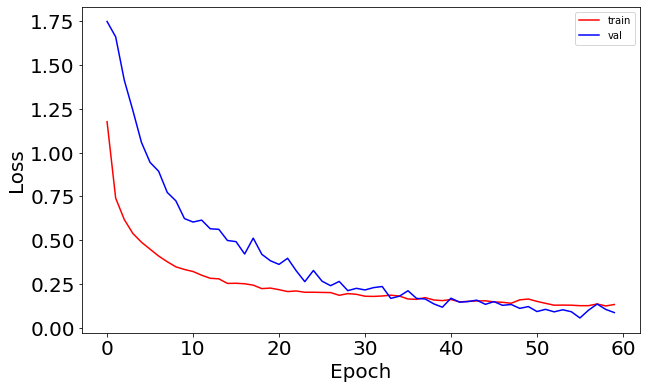

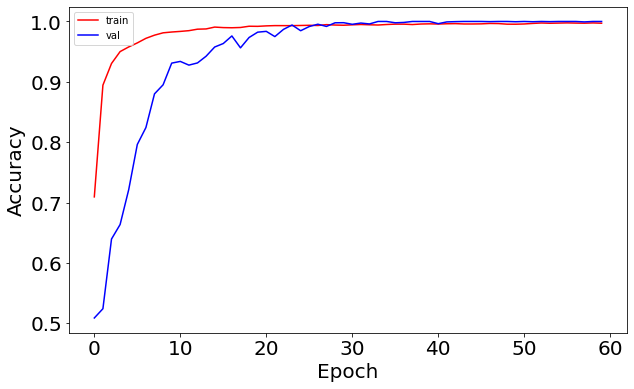

In [544]:
# Plot the loss function
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['loss']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_loss']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Loss', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

# Plot the accuracy
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(np.sqrt(model_history.history['accuracy']), 'r', label='train')
ax.plot(np.sqrt(model_history.history['val_accuracy']), 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
ax.tick_params(labelsize=20)

In [545]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

In [546]:
def create_model_2(optimizer='adam'):
    model = Sequential()
    model.add(Dense(70, input_shape=input_shape, activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(30, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))

    # compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [547]:
model_init_batch_epoch_CV = KerasClassifier(build_fn=create_model_2, verbose=0)

# we choose the initializers that came at the top in our previous cross-validation!!
batches = [128, 256, 512]
epochs = [40, 50, 60]

# grid search for initializer, batch size and number of epochs
param_grid = dict(epochs=epochs, batch_size=batches)
grid = GridSearchCV(estimator=model_init_batch_epoch_CV, 
                    param_grid=param_grid,
                    cv=3)
grid_result = grid.fit(X_train, Y_train)

In [548]:
print(f'Best Accuracy for {grid_result.best_score_:.4} using {grid_result.best_params_}')
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print(f'mean={mean:.4}, std={stdev:.4} using {param}')

Best Accuracy for 0.9687 using {'batch_size': 128, 'epochs': 60}
mean=0.9654, std=0.01752 using {'batch_size': 128, 'epochs': 40}
mean=0.9599, std=0.006815 using {'batch_size': 128, 'epochs': 50}
mean=0.9687, std=0.02222 using {'batch_size': 128, 'epochs': 60}
mean=0.9212, std=0.04927 using {'batch_size': 256, 'epochs': 40}
mean=0.9637, std=0.02435 using {'batch_size': 256, 'epochs': 50}
mean=0.964, std=0.02513 using {'batch_size': 256, 'epochs': 60}
mean=0.9097, std=0.03169 using {'batch_size': 512, 'epochs': 40}
mean=0.9339, std=0.00359 using {'batch_size': 512, 'epochs': 50}
mean=0.9406, std=0.02483 using {'batch_size': 512, 'epochs': 60}
